In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("/Users/quasar/downloads/Macro_plots/MRW1992/data/mrw.csv", header=0)


In [36]:
#convenience stuff
data = data.drop(data.columns[11], axis = 1)
data = data.drop(data.columns[0], axis = 1)
data = data.set_index('country')

data

,n,i,o,rgdpw60,rgdpw85,gdpgrowth,popgrowth,i_y,school,lngd,ls,const,ls_lngd
country,,,,,,,,,,,,,
Algeria,1,1,0,2485.0,4371.0,4.8,2.6,24.1,4.5,-2.577022,-1.422958,1,1.154064
Angola,1,0,0,1588.0,1171.0,0.8,2.1,5.8,1.8,-2.645075,-2.847312,1,-0.202237
Benin,1,0,0,1116.0,1071.0,2.2,2.4,10.8,1.8,-2.603690,-2.225624,1,0.378066
Botswana,1,1,0,959.0,3671.0,8.6,3.2,28.3,2.9,-2.501036,-1.262308,1,1.238728
Burkina Faso,1,0,0,529.0,857.0,2.9,0.9,12.7,0.4,-2.830218,-2.063568,1,0.766650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Australia,1,1,1,8440.0,13409.0,3.8,2.0,31.5,9.8,-2.659260,-1.155183,1,1.504077
Fiji,0,0,0,3634.0,NaN,4.2,NaN,20.6,8.1,-2.995732,-1.579879,1,1.415853
Indonesia,1,1,0,879.0,2159.0,5.5,1.9,13.9,4.1,-2.673649,-1.973281,1,0.700367


In [37]:

#creating desired variables
data['lngd'] = np.log(data['popgrowth']/100 + 0.05)
data['ls'] = np.log(data['i_y']/100)
data['const'] = 1
data['ls_lngd'] = data['ls'] - data['lngd']

data

,n,i,o,rgdpw60,rgdpw85,gdpgrowth,popgrowth,i_y,school,lngd,ls,const,ls_lngd
country,,,,,,,,,,,,,
Algeria,1,1,0,2485.0,4371.0,4.8,2.6,24.1,4.5,-2.577022,-1.422958,1,1.154064
Angola,1,0,0,1588.0,1171.0,0.8,2.1,5.8,1.8,-2.645075,-2.847312,1,-0.202237
Benin,1,0,0,1116.0,1071.0,2.2,2.4,10.8,1.8,-2.603690,-2.225624,1,0.378066
Botswana,1,1,0,959.0,3671.0,8.6,3.2,28.3,2.9,-2.501036,-1.262308,1,1.238728
Burkina Faso,1,0,0,529.0,857.0,2.9,0.9,12.7,0.4,-2.830218,-2.063568,1,0.766650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Australia,1,1,1,8440.0,13409.0,3.8,2.0,31.5,9.8,-2.659260,-1.155183,1,1.504077
Fiji,0,0,0,3634.0,NaN,4.2,NaN,20.6,8.1,NaN,-1.579879,1,NaN
Indonesia,1,1,0,879.0,2159.0,5.5,1.9,13.9,4.1,-2.673649,-1.973281,1,0.700367


In [39]:
data['lschool'] = np.log(data['school'])
data['lsch_ngd'] = data['lschool'] - data['lngd']
data['ly60'] = np.log(data['rgdpw60'])
data['ly85'] = np.log(data['rgdpw85'])
data['linv'] = np.log(data['i_y'])

#subsetting data
data_reg = data.loc[data['n'] == 1, :] #no oil
data_d = data_reg[data_reg.i == 1] #pop in 1960 less than 1 mil
data_oecd = data_reg[data_reg.o == 1] #oecd

data

,n,i,o,rgdpw60,rgdpw85,gdpgrowth,popgrowth,i_y,school,lngd,ls,const,ls_lngd,lschool,lsch_ngd,ly60,ly85,linv
country,,,,,,,,,,,,,,,,,,
Algeria,1,1,0,2485.0,4371.0,4.8,2.6,24.1,4.5,-2.577022,-1.422958,1,1.154064,1.504077,4.081099,7.818028,8.382747,3.182212
Angola,1,0,0,1588.0,1171.0,0.8,2.1,5.8,1.8,-2.645075,-2.847312,1,-0.202237,0.587787,3.232862,7.370231,7.065613,1.757858
Benin,1,0,0,1116.0,1071.0,2.2,2.4,10.8,1.8,-2.603690,-2.225624,1,0.378066,0.587787,3.191477,7.017506,6.976348,2.379546
Botswana,1,1,0,959.0,3671.0,8.6,3.2,28.3,2.9,-2.501036,-1.262308,1,1.238728,1.064711,3.565747,6.865891,8.208219,3.342862
Burkina Faso,1,0,0,529.0,857.0,2.9,0.9,12.7,0.4,-2.830218,-2.063568,1,0.766650,-0.916291,1.913927,6.270988,6.753438,2.541602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Australia,1,1,1,8440.0,13409.0,3.8,2.0,31.5,9.8,-2.659260,-1.155183,1,1.504077,2.282382,4.941642,9.040738,9.503681,3.449988
Fiji,0,0,0,3634.0,NaN,4.2,NaN,20.6,8.1,NaN,-1.579879,1,NaN,2.091864,NaN,8.198089,NaN,3.025291
Indonesia,1,1,0,879.0,2159.0,5.5,1.9,13.9,4.1,-2.673649,-1.973281,1,0.700367,1.410987,4.084636,6.778785,7.677400,2.631889


In [40]:
#no restrictions on coefficients here
reg1 = sm.OLS(endog = data_reg['ly85'],
              exog = data_reg[['const', 'ls', 'lngd']],
             missing = 'drop').fit()

reg2 = sm.OLS(endog = data_d['ly85'],
             exog = data_d[['const', 'ls', 'lngd']],
             missing = 'drop').fit()

reg3 = sm.OLS(endog = data_oecd['ly85'],
             exog = data_oecd[['const', 'ls', 'lngd']],
             missing = 'drop').fit()

In [41]:
# restricted model 
#coeff(log(savings)) = -coeff(log(n+g+d))
regr1 = sm.OLS(endog = data_reg['ly85'],
             exog = data_reg[['const', 'ls_lngd']],
             missing = 'drop').fit()

regr2 = sm.OLS(endog = data_d['ly85'],
             exog = data_d[['const', 'ls_lngd']],
             missing = 'drop').fit()

regr3 = sm.OLS(endog = data_oecd['ly85'],
             exog = data_oecd[['const', 'ls_lngd']],
             missing = 'drop').fit()

In [42]:
info_dict = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied α': lambda x: f"{x.params[1]/(1 + x.params[1]):.2f}"}

results_unres = summary_col(results = [reg1, reg2, reg3],
                           float_format='%0.2f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dict,
                           regressor_order = ['const',
                                             'ls',
                                             'lngd'])


results_res = summary_col(results = [regr1, regr2, regr3],
                           float_format='%0.2f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dict,
                           regressor_order = ['const',
                                             'ls',
                                             'ls_lngd'])


results_res.add_title('Restricted Regressions')
results_unres.add_title('Unrestricted Regressions')
print(results_unres)
print('')
print(results_res)

          Unrestricted Regressions
               Non-Oil  Intermediate   OECD 
--------------------------------------------
const          5.43***  5.35***      8.02***
               (1.58)   (1.54)       (2.52) 
ls             1.42***  1.32***      0.50   
               (0.14)   (0.17)       (0.43) 
lngd           -1.99*** -2.02***     -0.74  
               (0.56)   (0.53)       (0.85) 
R-squared      0.60     0.60         0.11   
R-squared Adj. 0.59     0.59         0.01   
R^2            0.5925   0.5878       0.0118 
N              98.0000  75.0000      22.0000
s.e.e.         0.6891   0.6106       0.3774 
Implied α      0.59     0.57         0.33   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01

          Restricted Regressions
               Non-Oil Intermediate   OECD 
-------------------------------------------
const          6.87*** 7.09***      8.62***
               (0.12)  (0.15)       (0.53) 
ls_lngd        1.49*** 1.43***      0.55   
               (0.12) 

In [43]:
# Human capital model
#no restrictions on coefficients here
regh1 = sm.OLS(endog = data_reg['ly85'],
             exog = data_reg[['const', 'ls', 'lngd', 'lschool']],
             missing = 'drop').fit()

regh2 = sm.OLS(endog = data_d['ly85'],
             exog = data_d[['const', 'ls', 'lngd', 'lschool']],
             missing = 'drop').fit()

regh3 = sm.OLS(endog = data_oecd['ly85'],
             exog = data_oecd[['const', 'ls', 'lngd', 'lschool']],
             missing = 'drop').fit()

In [44]:
#coeff(log(savings)) = -coeff(log(n+g+d))
reghr1 = sm.OLS(endog = data_reg['ly85'],
             exog = data_reg[['const', 'ls_lngd', 'lsch_ngd']],
             missing = 'drop').fit()

reghr2 = sm.OLS(endog = data_d['ly85'],
             exog = data_d[['const', 'ls_lngd', 'lsch_ngd']],
             missing = 'drop').fit()

reghr3 = sm.OLS(endog = data_oecd['ly85'],
             exog = data_oecd[['const', 'ls_lngd', 'lsch_ngd']],
             missing = 'drop').fit()

In [45]:
info_dictu = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied α': lambda x: f"{x.params[1]/(1 + x.params[1] + x.params[3]):.2f}",
            'Implied β': lambda x: f"{x.params[3]/(1 + x.params[1] + x.params[3]):.2f}"}

info_dictr = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied α': lambda x: f"{x.params[1]/(1 + x.params[1] + x.params[2]):.2f}",
            'Implied β': lambda x: f"{x.params[2]/(1 + x.params[1] + x.params[2]):.2f}"}

results_unres = summary_col(results = [regh1, regh2, regh3],
                           float_format='%0.2f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictu,
                           regressor_order = ['const',
                                             'ls',
                                             'lngd',
                                             'lschool'])


results_res = summary_col(results = [reghr1, reghr2, reghr3],
                           float_format='%0.2f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictr,
                           regressor_order = ['const',
                                             'ls',
                                             'ls_lngd',
                                             'lsch_ngd'])


results_res.add_title('Restricted Regressions')
results_unres.add_title('Unrestricted Regressions')
print(results_unres)
print('')
print(results_res)

          Unrestricted Regressions
               Non-Oil  Intermediate   OECD 
--------------------------------------------
const          3.83***  4.43***      5.10*  
               (1.18)   (1.16)       (2.47) 
ls             0.70***  0.70***      0.28   
               (0.13)   (0.15)       (0.39) 
lngd           -1.75*** -1.50***     -1.08  
               (0.42)   (0.40)       (0.76) 
lschool        0.65***  0.73***      0.77** 
               (0.07)   (0.10)       (0.29) 
R-squared      0.79     0.78         0.35   
R-squared Adj. 0.78     0.77         0.24   
R^2            0.7788   0.7714       0.2444 
N              98.0000  75.0000      22.0000
s.e.e.         0.5077   0.4547       0.3300 
Implied α      0.30     0.29         0.14   
Implied β      0.28     0.30         0.38   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01

          Restricted Regressions
               Non-Oil Intermediate   OECD 
-------------------------------------------
const          4.83

In [48]:
regcon1 = sm.OLS(endog = (data_reg['ly85'] - data_reg['ly60']),
               exog = data_reg[['const', 'ly60']],
               missing = 'drop').fit()

regcon2 = sm.OLS(endog = (data_d['ly85'] - data_d['ly60']),
               exog = data_d[['const', 'ly60']],
               missing = 'drop').fit()

regcon3 = sm.OLS(endog = (data_oecd['ly85'] - data_oecd['ly60']),
               exog = data_oecd[['const', 'ly60']],
               missing = 'drop').fit()

In [49]:
info_dictroc = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied λ': lambda x: f"{-np.log(x.params[1] + 1)/25:.5f}"}

table_roc = summary_col(results = [regcon1, regcon2, regcon3],
                           float_format='%0.5f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictroc,
                           regressor_order = ['const',
                                             'ly60'])

table_roc.add_title('Tests for Unconditional Convergence')
print(table_roc)

       Tests for Unconditional Convergence
                Non-Oil  Intermediate     OECD   
-------------------------------------------------
const          -0.26658  0.58752      3.68629*** 
               (0.37960) (0.43293)    (0.68490)  
ly60           0.09431*  -0.00424     -0.34110***
               (0.04962) (0.05484)    (0.07852)  
R-squared      0.03627   0.00008      0.48545    
R-squared Adj. 0.02623   -0.01362     0.45973    
R^2            0.0262    -0.0136      0.4597     
N              98.0000   75.0000      22.0000    
s.e.e.         0.4405    0.4077       0.1830     
Implied λ      -0.00360  0.00017      0.01669    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [50]:
regcon4 = sm.OLS(endog = (data_reg['ly85'] - data_reg['ly60']),
               exog = data_reg[['const', 'ly60', 'ls', 'lngd']],
               missing = 'drop').fit()

regcon5 = sm.OLS(endog = (data_d['ly85'] - data_d['ly60']),
               exog = data_d[['const', 'ly60', 'ls', 'lngd']],
               missing = 'drop').fit()

regcon6 = sm.OLS(endog = (data_oecd['ly85'] - data_oecd['ly60']),
               exog = data_oecd[['const', 'ly60', 'ls', 'lngd']],
               missing = 'drop').fit()



regcon7 = sm.OLS(endog = (data_reg['ly85'] - data_reg['ly60']),
               exog = data_reg[['const', 'ly60', 'ls', 'lngd', 'lschool']],
               missing = 'drop').fit()

regcon8 = sm.OLS(endog = (data_d['ly85'] - data_d['ly60']),
               exog = data_d[['const', 'ly60', 'ls', 'lngd', 'lschool']],
               missing = 'drop').fit()

regcon9 = sm.OLS(endog = (data_oecd['ly85'] - data_oecd['ly60']),
               exog = data_oecd[['const', 'ly60', 'ls', 'lngd', 'lschool']],
               missing = 'drop').fit()

In [51]:
info_dictroc2 = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied λ': lambda x: f"{-np.log(x.params[1] + 1)/25:.5f}"}

table_roc2 = summary_col(results = [regcon4, regcon5, regcon6],
                           float_format='%0.5f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictroc,
                           regressor_order = ['const',
                                             'ly60',
                                             'ls',
                                             'lngd'])


table_roc3 = summary_col(results = [regcon7, regcon8, regcon9],
                           float_format='%0.5f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictroc,
                           regressor_order = ['const',
                                             'ly60',
                                             'ls',
                                             'lngd',
                                             'lschool'])

table_roc2.add_title('Tests for Conditional Convergence')
table_roc3.add_title('Tests for Conditional Convergence')
print(table_roc2)
print(" ")
print(table_roc3)

         Tests for Conditional Convergence
                 Non-Oil   Intermediate     OECD   
---------------------------------------------------
const          1.91938**   2.24968**    2.14036*   
               (0.83367)   (0.85472)    (1.18068)  
ly60           -0.14090*** -0.22783***  -0.34991***
               (0.05202)   (0.05725)    (0.06574)  
ls             0.64724***  0.64587***   0.39010**  
               (0.08670)   (0.10392)    (0.17612)  
lngd           -0.30235    -0.45746     -0.76624** 
               (0.30438)   (0.30743)    (0.34523)  
R-squared      0.40187     0.37882      0.67668    
R-squared Adj. 0.38278     0.35258      0.62279    
R^2            0.3828      0.3526       0.6228     
N              98.0000     75.0000      22.0000    
s.e.e.         0.3507      0.3258       0.1529     
Implied λ      0.00607     0.01034      0.01723    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
 
         Tests for Conditional Convergence
                 Non-

In [52]:
regconr1 = sm.OLS(endog = (data_reg['ly85'] - data_reg['ly60']),
               exog = data_reg[['const', 'ly60', 'ls_lngd', 'lsch_ngd']],
               missing = 'drop').fit()

regconr2 = sm.OLS(endog = (data_d['ly85'] - data_d['ly60']),
               exog = data_d[['const', 'ly60', 'ls_lngd', 'lsch_ngd']],
               missing = 'drop').fit()

regconr3 = sm.OLS(endog = (data_oecd['ly85'] - data_oecd['ly60']),
               exog = data_oecd[['const', 'ly60', 'ls_lngd', 'lsch_ngd']],
               missing = 'drop').fit()

In [53]:
info_dictrocr = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied λ': lambda x: f"{-np.log(x.params[1] + 1)/25:.5f}"}
table_rocr = summary_col(results = [regconr1, regconr2, regconr3],
                           float_format='%0.5f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictroc,
                           regressor_order = ['const',
                                             'ly60',
                                             'ls_lngd', 
                                              'lsch_ngd'])

table_rocr.add_title('Rate of Convergence - Restricted')
print(table_rocr)

         Rate of Convergence - Restricted
                 Non-Oil   Intermediate     OECD   
---------------------------------------------------
const          1.37384***  1.86679***   2.44270*** 
               (0.33571)   (0.36760)    (0.69118)  
ly60           -0.29790*** -0.37236***  -0.40221***
               (0.06041)   (0.06687)    (0.06918)  
ls_lngd        0.50067***  0.50635***   0.39532**  
               (0.08219)   (0.09508)    (0.15174)  
lsch_ngd       0.23519***  0.26569***   0.24125    
               (0.05916)   (0.08000)    (0.14244)  
R-squared      0.48162     0.45994      0.70738    
R-squared Adj. 0.46508     0.43712      0.65861    
R^2            0.4651      0.4371       0.6586     
N              98.0000     75.0000      22.0000    
s.e.e.         0.3265      0.3038       0.1454     
Implied λ      0.01415     0.01863      0.02058    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [54]:
reg_plt2 = sm.OLS(data_d['ly60'],
                 data_d[['lngd', 'linv']],
                 missing = 'drop').fit()
residly601 = reg_plt2.resid

reg_plt3 = sm.OLS(data_d['ly85'] - data_d['ly60'],
                 data_d[['lngd', 'linv']],
                 missing = 'drop').fit()
residgr1 = reg_plt3.resid




reg_plt4 = sm.OLS(data_d['ly60'],
                 data_d[['lngd', 'linv', 'lschool']],
                 missing = 'drop').fit()
residly602 = reg_plt4.resid

reg_plt5 = sm.OLS(data_d['ly85'] - data_d['ly60'],
                 data_d[['lngd', 'linv', 'lschool']],
                 missing = 'drop').fit()
residgr2 = reg_plt5.resid

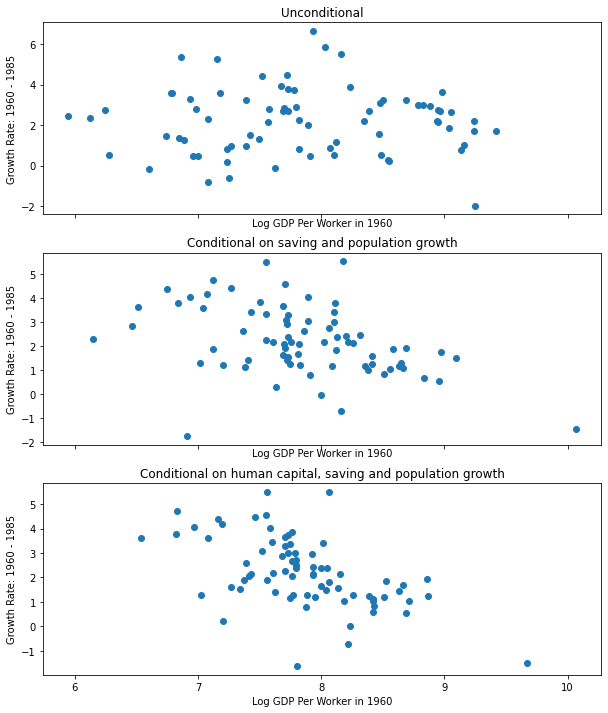

In [55]:
fig, ax = plt.subplots(3, 1, sharex = 'col', figsize = (10, 12))
ax[0].scatter(data_d['ly60'], (data_d['ly85'] - data_d['ly60'])*100/25)
ax[0].set_xlabel('Log GDP Per Worker in 1960')
ax[0].set_ylabel('Growth Rate: 1960 - 1985')
ax[0].set_title('Unconditional')


ax[1].scatter(residly601 + np.mean(data_d['ly60']), 
           (residgr1 + np.mean(data_d['ly85'] - data_d['ly60']))*100/25)
ax[1].set_xlabel('Log GDP Per Worker in 1960')
ax[1].set_ylabel('Growth Rate: 1960 - 1985')
ax[1].set_title('Conditional on saving and population growth')


ax[2].scatter(residly602 + np.mean(data_d['ly60']), 
           (residgr2 + np.mean(data_d['ly85'] - data_d['ly60']))*100/25)
ax[2].set_xlabel('Log GDP Per Worker in 1960')
ax[2].set_ylabel('Growth Rate: 1960 - 1985')
ax[2].set_title('Conditional on human capital, saving and population growth')
plt.show()